# Projeto de Análise de Frequência em Academia

## Objetivo do Projeto

Este projeto tem como objetivo **transformar dados brutos de frequência em acadêmia em insights acionáveis** através de um dashboard dinâmico no Power BI. O sistema foi concebido para ser utilizado rotineiramente pela equipe de gestão, proporcionando:

- Monitoramento semanal do comportamento dos alunos
- Identificação de padrões de frequência
- Análise da popularidade de aulas coletivas
- Segmentação do público por características demográficas
- Detecção precoce de problemas operacionais

## Contexto Operacional

**Frequência de Atualização:** Semanal  
**Período Analisado:** Semana anterior (últimos 7 dias)  
**Uso Pretendido:** Tomada de decisão estratégica no início/fim de cada semana cíclica  

## Fonte dos Dados

Os dados brutos foram obtidos através da plataforma [Kaggle](https://www.kaggle.com/datasets/ka66ledata/gym-membership-dataset). O conjunto de dados foi tratado para representar:

- Registros de check-in
- Participação em aulas coletivas
- Informações demográficas básicas
- Tipo de plano de assinatura

## Metodologia de Análise

### Abordagem Principal
Transformamos os dados em **indicadores visuais** que respondem a quatro questões-chave:

1. Qual a distribuição de clientes entre os planos oferecidos?
2. Como a frequência se distribui por faixa etária e gênero?
3. Quais são os horários e dias de maior movimento?
4. Quais aulas coletivas têm maior e menor adesão?

### Diferenciais do [Dashboard](https://app.powerbi.com/view?r=eyJrIjoiOWU2YmZiNmUtODE4Mi00OTFjLTk5NGQtMmQ3ZTU4YTEzZWQ1IiwidCI6IjJmNGMxYjM3LTk1MGEtNGRhZS05Njc1LWI3MTk4Y2E0NDVhZCJ9) 
- **Atualização automática**: Pronto para receber novos dados semanais
- **Filtros inteligentes**: Permite análises segmentadas
- **Visualização intuitiva**: Gráficos interconectados para descoberta de insights
- **Foco em ação**: Destaque para indicadores que demandam intervenção

## Valor Gerado

Este projeto serve como **ferramenta estratégica** para:

- Otimizar o escalonamento de instrutores
- Ajustar a oferta de aulas conforme demanda
- Identificar oportunidades de melhoria na experiência do cliente
- Desenvolver estratégias de retenção baseadas em dados
- Monitorar a eficácia de promoções e campanhas

# Dataset + Pacotes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("acad.csv")

df.drop(columns='id', inplace=True)

df.head()

# Metadados

metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique() 
metadados['tipo'] = metadados['dtype'].astype(str) 

metadados

,dtype,missing,valores_unicos,tipo
gender,object,0,2,object
birthday,object,0,974,object
Age,int64,0,38,int64
abonoment_type,object,0,2,object
visit_per_week,int64,0,5,int64
days_per_week,object,0,115,object
attend_group_lesson,bool,0,2,bool
fav_group_lesson,object,497,253,object
avg_time_check_in,object,0,556,object
avg_time_check_out,object,0,572,object


In [3]:
df.dtypes

gender                   object
birthday                 object
Age                       int64
abonoment_type           object
visit_per_week            int64
days_per_week            object
attend_group_lesson        bool
fav_group_lesson         object
avg_time_check_in        object
avg_time_check_out       object
avg_time_in_gym           int64
drink_abo                  bool
fav_drink                object
personal_training          bool
name_personal_trainer    object
uses_sauna                 bool
dtype: object

# Tratamento de dados

Nesta etapa, realizaremos uma análise e preparação minuciosa dos dados, com os seguintes objetivos:

1. **Análise Exploratória**: Verificar a distribuição e proporção dos valores em cada coluna para identificar possíveis desbalanceamentos ou inconsistências.

2. **Ajuste de Tipos de Dados**: Garantir que cada coluna esteja no formato adequado (e.g., numérico, categórico, datetime) para otimizar processamento e análise.

3. **Feature Engineering**: Criar novas variáveis (colunas) a partir dos dados existentes, quando aplicável, para enriquecer o conjunto de dados e melhorar a modelagem.

## Coluna 1: *gender*

In [4]:
df['gender'].value_counts()

gender
Female    503
Male      497
Name: count, dtype: int64

***Conclusões:***
A base está balanceada em relação ao gênero, com proporções praticamente equivalentes (≈50% para cada).

## Coluna 2: *birthday*

A coluna `birthday` está com o Formato

In [5]:
df['birthday'].head()

0    1997-04-18
1    1977-09-18
2    1983-03-30
3    1980-04-12
4    1980-09-10
Name: birthday, dtype: object

## Coluna 3: *Age*

In [6]:
print("Idade mínima:", df['Age'].min())
print("\nIdade média:", df['Age'].mean())
print("\nIdade máxima:", df['Age'].max())

Idade mínima: 12

Idade média: 30.604

Idade máxima: 49


**Observações:**

1. A academia atende desde adolescentes (a partir de 12 anos) até adultos em fase intermediária (idade máxima de 49 anos).

2. A média de idade (≈30.6 anos) sugere um público predominantemente jovem/adulto.

## Coluna 4: *abonoment_type*

In [7]:
df['abonoment_type'].value_counts()

abonoment_type
Standard    507
Premium     493
Name: count, dtype: int64

Proporção equilibrada entre os tipos de assinatura, com leve predominância do plano **Standard**.

In [8]:
df['monthly_fee'] = df['abonoment_type'].map({'Standard': 100, 'Premium': 250}).astype(int)
df['monthly_fee'].value_counts()

df['abonoment_type'] = df['abonoment_type'].map({'Standard': 0, 'Premium': 1})

Os valores foram baseados na média de preços praticados por grandes academias da região da **Grande Florianópolis — SC**

* Plano Standard: R$ 100/mês (acesso básico à academia)

* Plano Premium: R$ 250/mês (acesso a aulas especiais e benefícios exclusivos)
<br><br>

**Contexto Regional**  
A escolha dos valores reflete o mercado local, onde academias de rede semelhantes (*SmartFit, Ironberg, Pratique, Eng do Corpo, Live, etc..*) possuem faixas de preço alinhadas a essa estrutura. <br><br>


*Observação: Os valores podem ser ajustados conforme a necessidade de análise de receita ou comparação com outras regiões.*  
*Observação²: os valores de `abonoment_tye` foram transformados em 0 e 1 para facilitar uma futura regressão logistica.*

## Coluna 5: *visit_per_week*

In [9]:
df['visit_per_week'].value_counts()

visit_per_week
3    312
2    274
1    194
5    124
4     96
Name: count, dtype: int64

In [10]:
df['commitment'] = df['visit_per_week'].map({1:1, 2:2, 3:2, 4:3, 5:3}).astype(int)
df['commitment'].value_counts()


commitment
2    586
3    220
1    194
Name: count, dtype: int64

**Distribuição do Comprometimento**

* Nível 2 (Médio): 586 alunos - maior parte com frequência 2-3x/semana

* Nível 3 (Alto): 220 alunos - frequência intensa (4-5x/semana)

* Nível 1 (Baixo): 194 alunos - frequência mínima (1x/semana)

**Insights**
* A maioria (586) mantém uma rotina moderada (2-3 visitas semanais)

* Grupo significativo (220) demonstra alto comprometimento

* Cerca de 20% dos alunos têm baixa frequência, podendo representar risco de cancelamento

## Coluna 6: *days_per_Week*

In [11]:
df['days_per_week'].head()

0    Mon, Sat, Tue, Wed
1         Mon, Sat, Wed
2                   Sat
3         Sat, Tue, Wed
4              Thu, Wed
Name: days_per_week, dtype: object

**Texto**

In [12]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for day in days:
    df[day] = df['days_per_week'].apply(lambda x: day in x)
    
df.drop(columns='days_per_week', inplace=True)

Cada dia da semana tornou-se uma feature independente, onde:

* `True` = aluno frequenta nesse dia

* `False` = aluno não frequenta nesse dia

Vantagens da Transformação  

* **Análise de Padrões**: Permite identificar dias com maior/menor movimentação

* **Modelagem**: Conversão para formato numérico (1/0) facilita algoritmos de *Machine Learning* que utilizaremos no futuro

* **Segmentação**: Possibilita cruzamentos com outras variáveis (ex.: plano x dias frequentes)

## Coluna 7: *attend_group_lesson*

In [13]:
df['attend_group_lesson'].value_counts()

attend_group_lesson
True     503
False    497
Name: count, dtype: int64

**Text**

In [14]:
df['fav_group_lesson'].head()

0    Kickboxen, BodyPump, Zumba
1                           NaN
2                         XCore
3                           NaN
4          Running, Yoga, Zumba
Name: fav_group_lesson, dtype: object

In [15]:
# Preencher NaNs com string vazia temporariamente para evitar erro no split
df['fav_group_lesson'] = df['fav_group_lesson'].fillna('')

# Criar um set com todas as atividades únicas (filtrando strings vazias)
all_lessons = set()
df['fav_group_lesson'].apply(lambda x: all_lessons.update({item.strip() for item in x.split(',') if item.strip()}))

# Criar colunas booleanas para cada aula
for lesson in all_lessons:
    df[lesson] = df['fav_group_lesson'].apply(lambda x: lesson in [item.strip() for item in x.split(',') if x.strip()])

# Criar coluna para quem não faz nenhuma atividade (verificando string vazia ou apenas vírgulas)
df['no_group_lesson'] = df['fav_group_lesson'].str.strip().isin(['', ','])

df.drop(columns='fav_group_lesson', inplace=True)

df.head()

,gender,birthday,Age,abonoment_type,visit_per_week,attend_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,...,LesMiles,BodyPump,XCore,Spinning,Yoga,Pilates,Running,Kickboxen,Zumba,no_group_lesson
0,Female,1997-04-18,27,1,4,True,19:31:00,21:27:00,116,False,...,False,True,False,False,False,False,False,True,True,False
1,Female,1977-09-18,47,0,3,False,19:31:00,20:19:00,48,False,...,False,False,False,False,False,False,False,False,False,True
2,Male,1983-03-30,41,1,1,True,08:29:00,10:32:00,123,True,...,False,False,True,False,False,False,False,False,False,False
3,Male,1980-04-12,44,1,3,False,09:54:00,11:33:00,99,True,...,False,False,False,False,False,False,False,False,False,True
4,Male,1980-09-10,44,0,2,True,08:29:00,09:19:00,50,False,...,False,False,False,False,True,False,True,False,True,False


**Estrutura Resultante**  

* Colunas booleanas para cada tipo de aula coletiva *(ex.: Yoga, Pilates)*

* Coluna `no_group_lesson` indicando alunos sem aulas preferidas

**Vantagens da Transformação** 

* **Análise de Popularidade**: Permite identificar aulas mais/menos populares

* **Personalização**: Facilita recomendações baseadas em preferências

* **Segmentação**: Possibilita cruzamentos com outras variáveis (ex.: plano x aulas preferidas)

**Exemplo de Insights Potenciais**

1. Correlação entre tipo de plano e preferência por aulas premium

2. Identificação de aulas complementares frequentadas pelos mesmos alunos

3. Percentual de alunos que não participam de aulas coletivas

E*sta abordagem segue o mesmo padrão de transformação aplicado aos dias de frequência, mantendo consistência metodológica.*

## Coluna 8, 9 e 10 : *avg_time_check_in*, *avg_time_check_out* e *avg_time_in_gym*

In [16]:
# Converter para datetime (só o horário)
df['avg_time_check_in'] = pd.to_datetime(df['avg_time_check_in'], format='%H:%M:%S').dt.time
df['avg_time_check_out'] = pd.to_datetime(df['avg_time_check_out'], format='%H:%M:%S').dt.time

In [17]:
df['avg_time_in_gym'].mean()

105.26

* **avg_time_check_in**: Horário médio de entrada (tipo `datetime`)

* **avg_time_check_out**: Horário médio de saída (tipo `datetime`)

* **avg_time_in_gym**: Tempo médio de permanência: **105.26** minutos ≈ **01 hora e 45 minutos**

## Coluna 11 e 12: *drink_abo* e *fav_drink*

In [18]:
df['drink_abo'].value_counts()

drink_abo
False    504
True     496
Name: count, dtype: int64

In [19]:
# Preencher NaNs com string vazia temporariamente para evitar erro no split
df['fav_drink'] = df['fav_drink'].fillna('')

# Criar um set com todas as atividades únicas (filtrando strings vazias)
all_lessons = set()
df['fav_drink'].apply(lambda x: all_lessons.update({item.strip() for item in x.split(',') if item.strip()}))

# Criar colunas booleanas para cada aula
for lesson in all_lessons:
    df[lesson] = df['fav_drink'].apply(lambda x: lesson in [item.strip() for item in x.split(',') if x.strip()])

# Criar coluna para quem não faz nenhuma atividade (verificando string vazia ou apenas vírgulas)
df['no_fav_drink'] = df['fav_drink'].str.strip().isin(['', ','])

df.drop(columns='fav_drink', inplace=True)

* Coluna no_fav_drink indicando alunos sem bebida preferida

**Vantagens da Transformação**

1. Análise de Consumo:

    * Identificar bebidas mais populares

    * Relacionar preferências com horários de treino

2. Personalização:

    * Sugerir combinações de bebidas baseadas em preferências<br><br>

3. Gestão de Estoque:

    * Previsão de demanda por tipo de bebida <br><br>


**Exemplo de Insights Potenciais**

1. Correlação entre tipo de plano e consumo de bebidas premium

2. Frequência de consumo de isotônicos em dias de aula intensa

3. Percentual de alunos que não consomem bebidas na academia

*Observação: Esta transformação segue o mesmo padrão aplicado às aulas coletivas, mantendo consistência na estruturação de dados categóricos.*

## Coluna 12 e 13: *personal_training* e *name_personal_trainer*

In [20]:
df['personal_training'].value_counts()

personal_training
True     518
False    482
Name: count, dtype: int64

In [21]:
df['name_personal_trainer'].value_counts()

name_personal_trainer
Chantal    153
Mike       140
Hanna      114
Jeffrey    111
Name: count, dtype: int64

**Estrutura Resultante**

* Colunas booleanas para cada tipo de bebida que é comprada na loja da academia

* Coluna `no_fav_drink` indicando alunos sem bebida preferida

**Vantagens da Transformação:**

* **Análise de Consumo:**

    1. Identificar bebidas mais populares
    
    2. Relacionar preferências com horários de treino

* **Personalização:**

    1. Sugerir combinações de bebidas baseadas em preferências  <br><br>

* **Gestão de Estoque:**

    1. Previsão de demanda por tipo de bebida

**Insights Potenciais:**

1. Correlação entre tipo de plano e consumo de bebidas premium

2. Frequência de consumo de isotônicos em dias de aula intensa

3. Percentual de alunos que não consomem bebidas na academia

4. Esta transformação segue o mesmo padrão aplicado às aulas coletivas, mantendo consistência na estruturação de dados categóricos.



## Coluna 13: *uses_sauna*

In [22]:
df['uses_sauna'].value_counts()

uses_sauna
False    507
True     493
Name: count, dtype: int64

**Principais Observações**:

* Proporção praticamente igual entre usuários e não-usuários:

    * Sugere que a sauna é um recurso bastante popular, porém não essencial

## Ordenando as colunas corretamente

Para uma organização que facilite o nosso trabalho, faremos da seguinte maneira:


1. **Informações básicas do cliente**
    * gender
    
    * birthday
    
    * Age <br><br>

2. **Dados do plano**
    * abonoment_type
    
    * monthly_fee
    
    * commitment <br><br>

3. **Frequência e horários**
    * visit_per_week
    
    * Mon a Sun (os dias que costuma frequentar a academia)
    
    * avg_time_check_in
    
    * avg_time_check_out
    
    * avg_time_in_gym <br><br>

4. **Aulas em grupo**
    * attend_group_lesson
    
    * (todas as atividades favoritas, ex: Kickboxen, Zumba, etc.)
    
    * no_group_lesson <br><br>
    
5. **Bebidas favoritas**
    * (sabores: lemon, berry_boost, etc.)
    
    * no_fav_drink <br><br>

6. **Serviços extras**
    * drink_abo
    
    * personal_training
    
    * name_personal_trainer
    
    * uses_sauna



In [23]:
ordem_nova = [
    # 1. Básico
    'gender', 'birthday', 'Age',
    
    # 2. Plano
    'abonoment_type', 'monthly_fee', 'commitment',
    
    # 3. Frequência e horários
    'visit_per_week', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
    'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
    
    # 4. Aulas em grupo
    'attend_group_lesson', 'Kickboxen', 'BodyPump', 'XCore', 'Yoga', 'Running', 
    'Pilates', 'LesMiles', 'HIT', 'Zumba', 'BodyBalance', 'Spinning', 'no_group_lesson',
    
    # 5. Bebidas favoritas
    'lemon', 'berry_boost', 'black_currant', 'orange', 'coconut_pineapple', 
    'passion_fruit', 'no_fav_drink',
    
    # 6. Serviços extras
    'drink_abo', 'personal_training', 'name_personal_trainer', 'uses_sauna'
]

df = df[ordem_nova]

df.columns

Index(['gender', 'birthday', 'Age', 'abonoment_type', 'monthly_fee',
       'commitment', 'visit_per_week', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri',
       'Sat', 'Sun', 'avg_time_check_in', 'avg_time_check_out',
       'avg_time_in_gym', 'attend_group_lesson', 'Kickboxen', 'BodyPump',
       'XCore', 'Yoga', 'Running', 'Pilates', 'LesMiles', 'HIT', 'Zumba',
       'BodyBalance', 'Spinning', 'no_group_lesson', 'lemon', 'berry_boost',
       'black_currant', 'orange', 'coconut_pineapple', 'passion_fruit',
       'no_fav_drink', 'drink_abo', 'personal_training',
       'name_personal_trainer', 'uses_sauna'],
      dtype='object')

## Salvando o Dataset para realização do Dashboard com Power BI

In [24]:
df.to_excel('dados_academia.xlsx', index=True, engine='openpyxl')   

# Insights

### Metadados

In [25]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique() 
metadados['tipo'] = metadados['dtype'].astype(str) 

metadados

,dtype,missing,valores_unicos,tipo
gender,object,0,2,object
birthday,object,0,974,object
Age,int64,0,38,int64
abonoment_type,int64,0,2,int64
monthly_fee,int32,0,2,int32
commitment,int32,0,3,int32
visit_per_week,int64,0,5,int64
Mon,bool,0,2,bool
Tue,bool,0,2,bool
Wed,bool,0,2,bool


## Análise de Dados e Insights

Com os dados preparados, vamos explorar:

**Padrões-chave**:
- Frequência por horário/dia da semana
- Preferências de aulas por tipo de plano
- Engajamento vs perfil demográfico

**Visualizações destacadas**:
- Mapas de calor de fluxo
- Comparativos entre planos
- Distribuições temporais

*As próximas visualizações revelarão oportunidades para otimizar operações e estratégias comerciais.*

### Distribuição de Lucro por Tipo de Plano

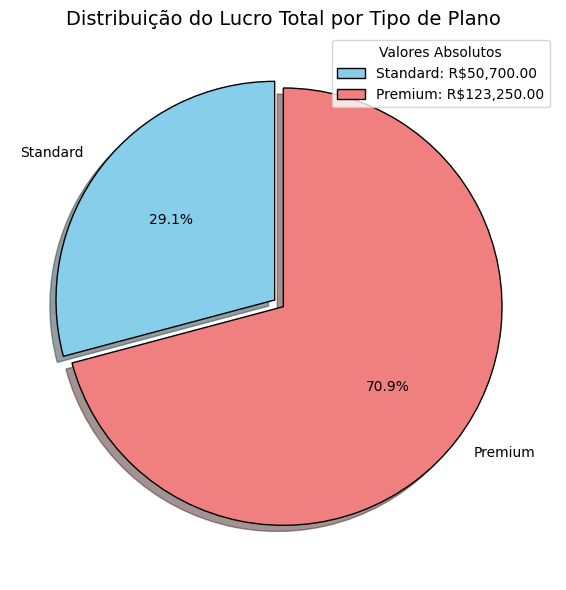

In [26]:
import matplotlib.pyplot as plt

# Agrupar e somar as mensalidades por tipo de plano
lucro_por_plano = df.groupby('abonoment_type')['monthly_fee'].sum()

# Definir rótulos e cores
labels = ['Standard', 'Premium']  # 0 = Standard | 1 = Premium
colors = ['skyblue', 'lightcoral']
explode = (0.05, 0)  # Destaque

# Plotar o gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(lucro_por_plano, 
        labels=labels, 
        colors=colors,
        explode=explode,

        # Melhorias gráficas
        
        autopct='%1.1f%%',  # Porcentagens
        shadow=True,  # Adicionar sombra
        startangle=90,  # Começar a partir do topo
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})  # Bordas pretas

plt.title('Distribuição do Lucro Total por Tipo de Plano', fontsize=14)
plt.tight_layout()

# Adicionar legenda com os valores absolutos
legend_labels = [f'{label}: R${value:,.2f}' for label, value in zip(labels, lucro_por_plano)]
plt.legend(legend_labels, title="Valores Absolutos", loc="best")

plt.show()

#### **Principais Insights**  

1. **Desproporção Financeira Significativa**  

    - **Plano Premium (29% dos alunos | 71% da receita)**  
      - *Dados*: 493 alunos (`R$123,250/mês`) vs 507 alunos Standard (`R$50,700/mês`)
      - *Motivo*: Mensalidade Premium é 2.5× maior (`R$250 vs R$100`)  
      - *Ação*: Priorizar campanhas de conversão Standard → Premium   <br><br>

2. **Eficiência por Aluno**  
    - Cada aluno Premium equivale a **2.5 alunos Standard** em receita  
    - *Exemplo*: Converter 50 alunos Standard = **+R$7,500/mês**  <br><br>

3. **Oportunidade de Crescimento**  
    - Migração de 10% dos Standard (51 alunos) para Premium:  
      - **Ganho Anual**: R$91,800 (sem custos operacionais adicionais)  <br><br>

4. **Lei de Pareto Aplicada**  
    - 29% da base gera 71% do faturamento  
    - *Recomendação*:  
      - Programas de fidelidade para Premium  
      - Benefícios exclusivos (aulas VIP, horários prioritários)  <br><br>

#### **Recomendações Estratégicas**  

1. **Segmentação Avançada**  
   - Identificar perfis de alunos Standard com potencial para upgrade (ex: alta frequência, participação em aulas)  <br><br>

2. **Promoções Direcionadas**  
   - Testar ofertas temporárias (ex.: "Experimente o plano Premium por `X` dias com `Y%` de desconto")  <br><br>

3. **Retenção de Premium**  
   - Criar pesquisas de satisfação específicas  
   - Oferecer recompensas por indicações  <br><br>

4. **Análise de ROI**  
   - Comparar custo de aquisição vs. receita média por plano  

> **Conclusão**: O plano Premium é o principal motor de receita. Estratégias de conversão e retenção podem aumentar o faturamento sem expandir a base total de clientes.  

### Análise de Frequência por Dia da Semana: Standard vs Premium

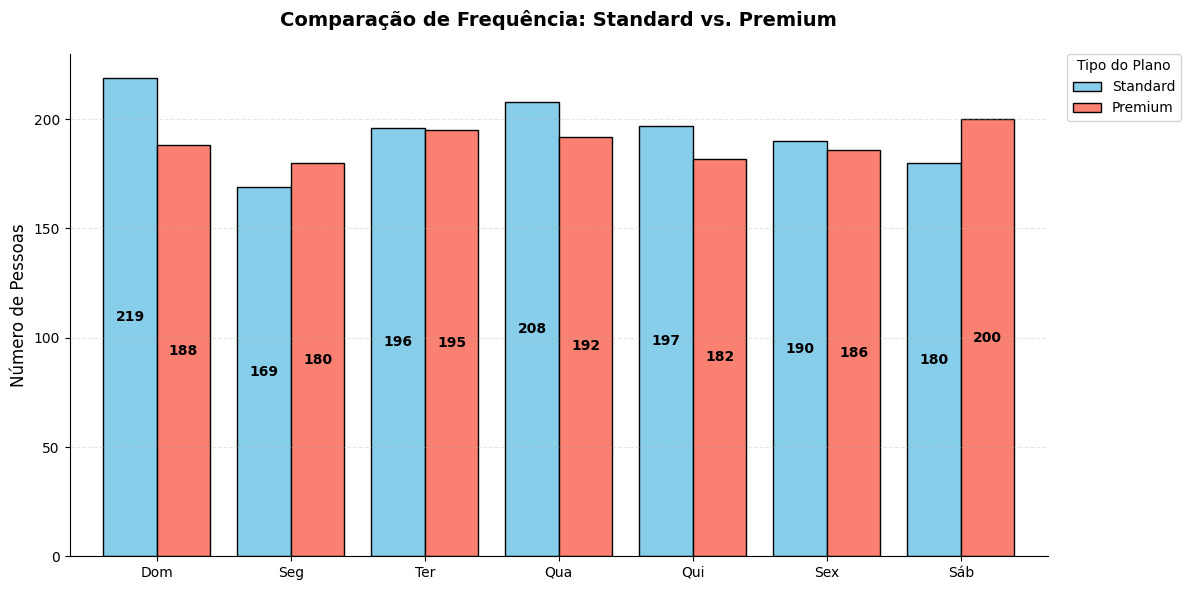

In [27]:
# Dias ordenados
dias_semana_ordenados = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Gráfico de barras
df_plot = df.groupby('abonoment_type')[dias_semana_ordenados].sum().T

# Plot com customização
ax = df_plot.plot(kind='bar', 
                 figsize=(12, 6), 
                 color=['skyblue', 'salmon'], 
                 edgecolor='black',
                 width=0.8)  # Largura ajustada

# Título e eixos
plt.title('Comparação de Frequência: Standard vs. Premium', pad=20, fontsize=14, fontweight='bold')
plt.xticks(range(len(dias_semana_ordenados)), 
          ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'],
          rotation=0)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adicionar valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Posicionamento do texto (dentro da barra)
    ax.text(x + width/2, 
            y + height/2,  # Centralizado verticalmente
            f'{int(height)}', 
            ha='center',
            va='center',
            color='black',
            fontsize=10,
            fontweight='bold')

# Customizar legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Standard', 'Premium'], 
          title='Tipo do Plano',
          bbox_to_anchor=(1.02, 1),
          borderaxespad=0)

# Remover bordas
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

#### **Principais Insights**

1. **Padrão Semanal de Frequência**
    - **Dias de Pico**: 
      - **Domingo (407 pessoas)** e **Quarta-feira (400 pessoas)** apresentam maior movimento
      - **Segunda-feira (349 pessoas)** tem a menor frequência
          - Contudo, junto de **Sábado (380 pessoas)** são os únicos dias que maior parte dos clientes possuem o `Plano Premium` <br><br>

2. **Constância**
    * **Plano Standard**:
      - Demonstra uma constância menor, tendo maior flutuação de clientes durante a semana
          * `Média`: **194** Alunos por dia
          * `Dia com menor quantidade de alunos standard`: **Segunda-feira** com **169** *(25 a menos que a média semanal)*
          * `Dia com maior quantidade de alunos standard`: **Domingo** com **219** *(25 a mais que a média semanal)* <br><br>
            
    * **Plano Premium**
      - Demonstra uma constância maior, tendo uma menor flutuação de clientes no decorrer da semana
          * `Média`: **189** alunos por dia
          * `Dia com menor quantidade de alunos premium`: **Segunda-feira** com **180** *(9 a menos que a média semanal)*
          * `Dia com maior quantidade de alunos premium`: **Sábado** com **200** *(11 a mais que a média semanal)* <br><br>
      


> **Conclusão**: Os planos Standard são maioria em quase todos os dias, enquanto os Premium mantém frequência mais equilibrada. Estratégias segmentadas por dia podem otimizar a ocupação e receita.

### Análise de Perfil Etário por Dia da Semana

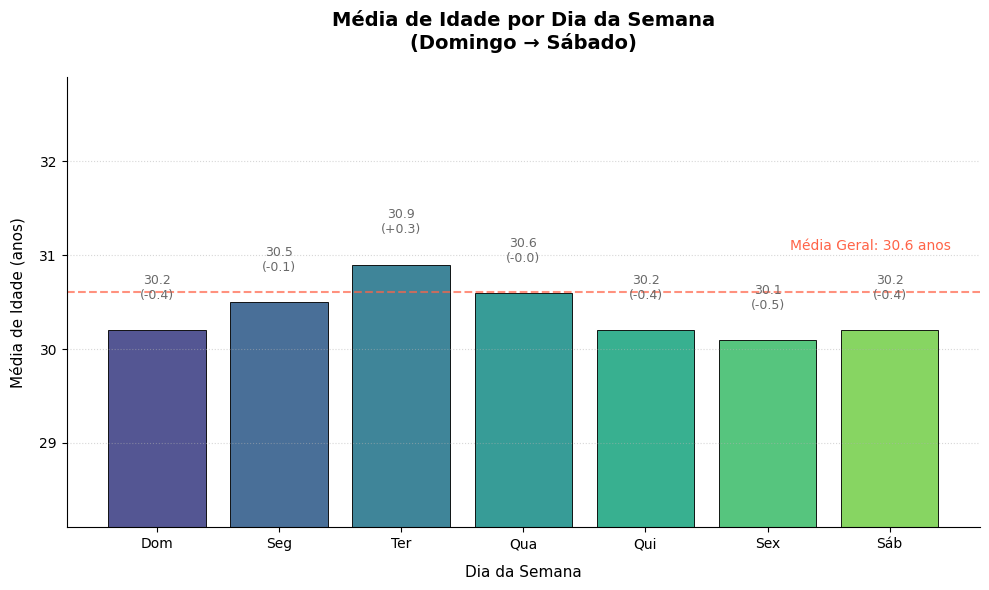

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Definir a ordem correta dos dias (Domingo -> Sábado)
dias_semana_ordenados = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Calcular médias
media_idade_por_dia = {dia: round(df[df[dia] == 1]['Age'].mean(), 1) for dia in dias_semana_ordenados}
media_idade_series = pd.Series(media_idade_por_dia)

# Criar figura
plt.figure(figsize=(10, 6))

# 1. Gráfico de barras ordenado
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(dias_semana_ordenados)))
bars = plt.bar(media_idade_series.index, media_idade_series.values, 
               color=colors, edgecolor='black', linewidth=0.7, alpha=0.9)

# 2. Linha de média geral
media_geral = df['Age'].mean()
plt.axhline(media_geral, color='tomato', linestyle='--', linewidth=1.5, alpha=0.7)
plt.text(6.5, media_geral+0.5, f'Média Geral: {media_geral:.1f} anos', 
         color='tomato', ha='right', va='center')

# 3. Rótulos aprimorados
for bar in bars:
    height = bar.get_height()
    diff = height - media_geral
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, 
             f'{height:.1f}\n({diff:+.1f})', 
             ha='center', va='bottom', fontsize=9, color='dimgrey')

# 4. Configurações do eixo X
plt.xticks(range(len(dias_semana_ordenados)), 
           ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'],  # Nomes em português
           rotation=0)

# 5. Elementos visuais
plt.title('Média de Idade por Dia da Semana\n(Domingo → Sábado)', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=11, labelpad=10)
plt.ylabel('Média de Idade (anos)', fontsize=11, labelpad=10)
plt.ylim(media_idade_series.min() - 2, media_idade_series.max() + 2)

# 6. Grid e estilo
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()


plt.show()

#### Insights Principais

* 1. **Variação Etária Significativa**
    - **Pico de idade**: Terça-feira (30.9 anos) - 0.8 anos acima da média semanal (30.6)
    - **Clientes mais jovens**: Sexta-feira (30.1 anos) - ideal para aulas dinâmicas
    - **Diferença máxima**: 0.8 anos entre terça (mais velhos) e sexta (mais jovens) <br><br>

* 2. **Padrão Semanal**
    - **Fim de semana**: Perfil homogêneo (Dom: 30.2 | Sáb: 30.2)
    - **Meio de semana**: 
      - Terça-feira atrai público +0.3 anos acima da média
      - Quarta-feira mantém exatamente a média (30.6) <br><br>

* 3. **Oportunidades por Dia**
    - **Terças (30.9 anos)**: 
      - Oferecer aulas de baixo impacto (ex: Pilates, Hidroginástica)
      - Promover programas "50+"<br><br>
        
    - **Sextas (30.1 anos)**:
      - Aulas HIIT e dança para público jovem
      - Happy Hours pós-treino <br><br>

#### Recomendações Estratégicas

  
1. **Grade de Aulas**
   - `Terça`: Aulas suaves + avaliação física
   - `Sexta`: Aulas em grupo high-energy <br><br>

2. **Marketing Direcionado**
   - Anúncios para >35 anos focados em terça
   - Promoções para <30 anos nas sextas <br><br>

> **Dado Crítico**: A diferença de 0.8 anos entre dias extremos sugere padrões comportamentais distintos por faixa etária. Recomenda-se pesquisa complementar sobre motivações.

###  Análise de Idade vs Nível de Compromentimento *(Commitment)*

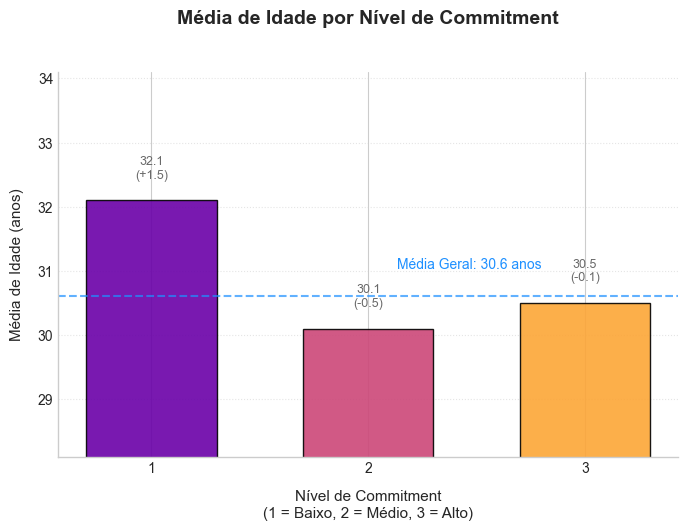

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Dados
media_idade_commitment = df.groupby('commitment')['Age'].mean().round(1)
media_geral = df['Age'].mean()

# Criar figura
plt.figure(figsize=(8, 5))

# 1. Gráfico de barras com gradiente de cor
colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(media_idade_commitment)))
bars = plt.bar(media_idade_commitment.index.astype(str), 
               media_idade_commitment.values,
               color=colors,
               edgecolor='black',
               width=0.6,
               alpha=0.9)

# 2. Linha de média geral
plt.axhline(media_geral, color='dodgerblue', linestyle='--', linewidth=1.5, alpha=0.7)
plt.text(len(media_idade_commitment)-1.2, media_geral+0.5, 
         f'Média Geral: {media_geral:.1f} anos', 
         color='dodgerblue', ha='right', va='center')

# 3. Rótulos aprimorados
for bar in bars:
    height = bar.get_height()
    diff = height - media_geral
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, 
             f'{height:.1f}\n({diff:+.1f})', 
             ha='center', va='bottom', 
             fontsize=9, color='dimgrey')

# 4. Elementos visuais
plt.title('Média de Idade por Nível de Commitment\n', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Nível de Commitment\n(1 = Baixo, 2 = Médio, 3 = Alto)', 
           fontsize=11, labelpad=10)
plt.ylabel('Média de Idade (anos)', fontsize=11, labelpad=10)
plt.ylim(media_idade_commitment.min() - 2, media_idade_commitment.max() + 2)

# 5. Grid e layout
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

#### Insights Principais

1. **Relação Direta entre Idade e Engagement**
    - **Commitment 3 (Alto)**: `Média de idade` muito próxima a `média geral de idade` (-0.1 anos vs média geral)
    - **Commitment 1 (Baixo)**: Perfil mais velho (+1.5 anos vs média geral)
    - *Interpretação*: Clientes mais velhos tendem a ter um comprometimento menor com atividades físicas. <br><br>

2. **Dados Críticos**
    - **Maior diferença**: 2.0 anos entre Commitment 1 e 2
    - **Média geral**: 30.6 anos (linha de referência azul) <br><br>

#### Recomendações Estratégicas

1. **Programas de Fidelização**
   - Criar tier system baseado em idade e frequência
   - Oferecer graduação de comprometimento (ex: "Evolua para Prata em 3 meses") <br><br>
 
2. **Grade de Aulas**
   - `Commitment Baixo`: Aulas de baixo impacto articular
   - `Commitment Alto`: Aulas com componente social (ex: Zumba) <br><br>

### 📊 Análise do Fluxo Diário na Academia

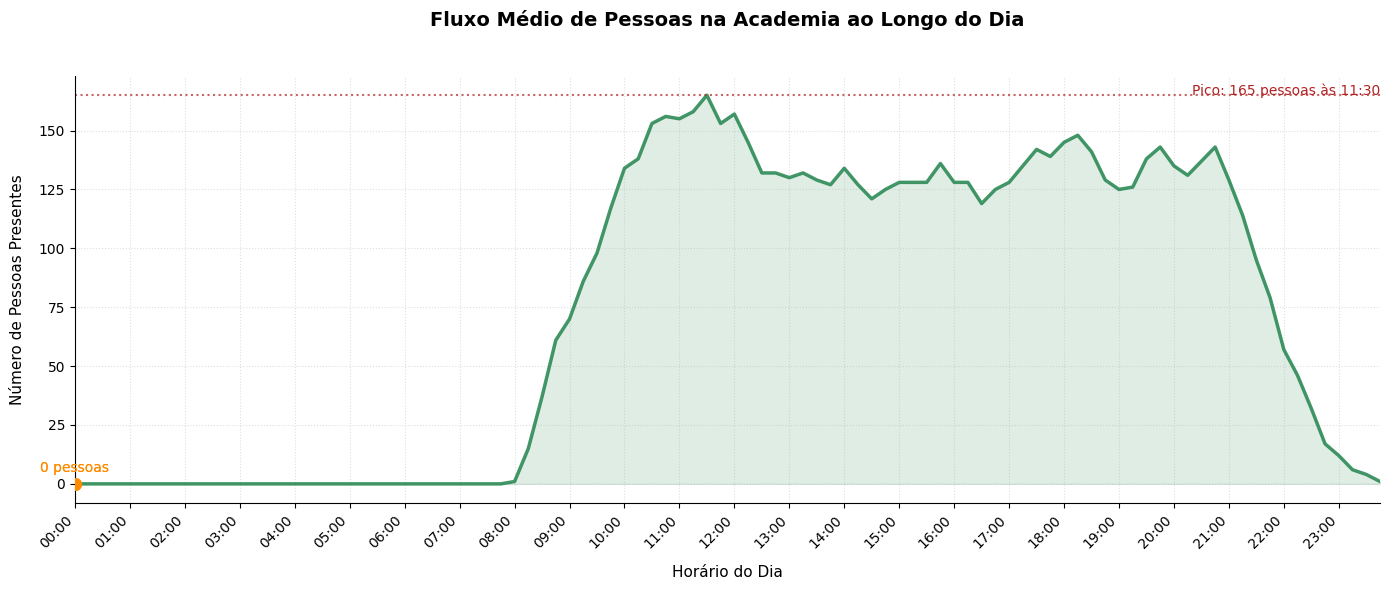

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Configurações de estilo (sem alterar o estilo base)
plt.style.use('default')

# Dados
horas = pd.date_range(start='00:00:00', end='23:59:00', freq='15min')
fluxo = []

for hora in horas:
    hora_time = hora.time()
    presentes = df.apply(lambda row: row['avg_time_check_in'] <= hora_time <= row['avg_time_check_out'], axis=1)
    fluxo.append(presentes.sum())

# Criar figura
plt.figure(figsize=(14, 6))

# 1. Gráfico de linha com preenchimento
line = plt.plot(horas, fluxo, color='seagreen', linewidth=2.5, alpha=0.9)[0]
plt.fill_between(horas, fluxo, color='seagreen', alpha=0.15)

# 2. Linha de média e pico
fluxo_series = pd.Series(fluxo, index=horas)
max_fluxo = fluxo_series.max()
hora_pico = fluxo_series.idxmax().strftime('%H:%M')
plt.axhline(y=max_fluxo, color='firebrick', linestyle=':', alpha=0.7, linewidth=1.5)
plt.text(horas[-1], max_fluxo+2, f'Pico: {max_fluxo} pessoas às {hora_pico}', 
         ha='right', va='center', color='firebrick')

# 3. Elementos visuais
plt.title('Fluxo Médio de Pessoas na Academia ao Longo do Dia\n', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Horário do Dia', fontsize=11, labelpad=10)
plt.ylabel('Número de Pessoas Presentes', fontsize=11, labelpad=10)

# 4. Eixo X aprimorado
plt.xticks(ticks=horas[::4], 
           labels=[h.strftime('%H:%M') for h in horas[::4]], 
           rotation=45, ha='right')
plt.xlim([horas[0], horas[-1]])

# 5. Grid e bordas
plt.grid(True, linestyle=':', alpha=0.4)
plt.gca().spines[['top', 'right']].set_visible(False)

# 6. Análise de horários estratégicos
for hora_marcada in ['12:00:00', '18:00:00']:
    idx = (horas == pd.to_datetime(hora_marcada).time()).argmax()
    plt.scatter(horas[idx], fluxo[idx], color='darkorange', s=70, zorder=5)
    plt.text(horas[idx], fluxo[idx]+5, f'{fluxo[idx]} pessoas', 
             ha='center', color='darkorange')

plt.tight_layout()
plt.show()

#### Insights Principais

1. **Pico de Movimentação**
    - **Horário de Pico**: 11:30h com 165 pessoas
    - **Padrão Típico**: Fluxo intenso no período pré-almoço (10h-12:30h)
    - *Interpretação*:
      1. Clientes preferem treinar perto do almoço, possivelmente antes ou após atividades profissionais.
      2. Possivelmente clientes com um maior intervalo em sua jornada de trabalho utilizam de seu intervalo para treinar. <br><br>

2. **Oportunidades Operacionais**
    - **Horários de Baixa Ocupação** 
      - Períodos entre 14h-16h (pós-almoço) e após 21h costumam ter menor movimento
    - **Sugestão**: Oferecer aulas especiais ou descontos nestes períodos <br><br>

3. **Gestão de Recursos**
    - **Alocação de Instrutores**: Máximo de staff às 11:30h
    - **Manutenção**: Programar para horários com menos movimento <br><br>

####  Recomendações Estratégicas

1. **Otimização de Espaço**
   - Criar sistema de agendamento para o horário de pico
   - Oferecer "express workouts" de 30min durante períodos críticos <br><br>

2. **Marketing Temporal**
   - Promover "Happy Hour Fitness" nos períodos de menor movimento
   - Pacotes especiais para horários fora de pico <br><br>

3. **Experiência do Cliente**
   - Enquetes para entender motivações do horário de pico
   - Sistema de alerta de lotação em tempo real <br><br>

> **Dado Crítico**: O pico de 165 pessoas simultâneas representam em média 1/3 dos alunos diários. Sugere-se análise de conforto espacial neste horário.

### Análise de Fluxo por Horário e Nível de Commitment

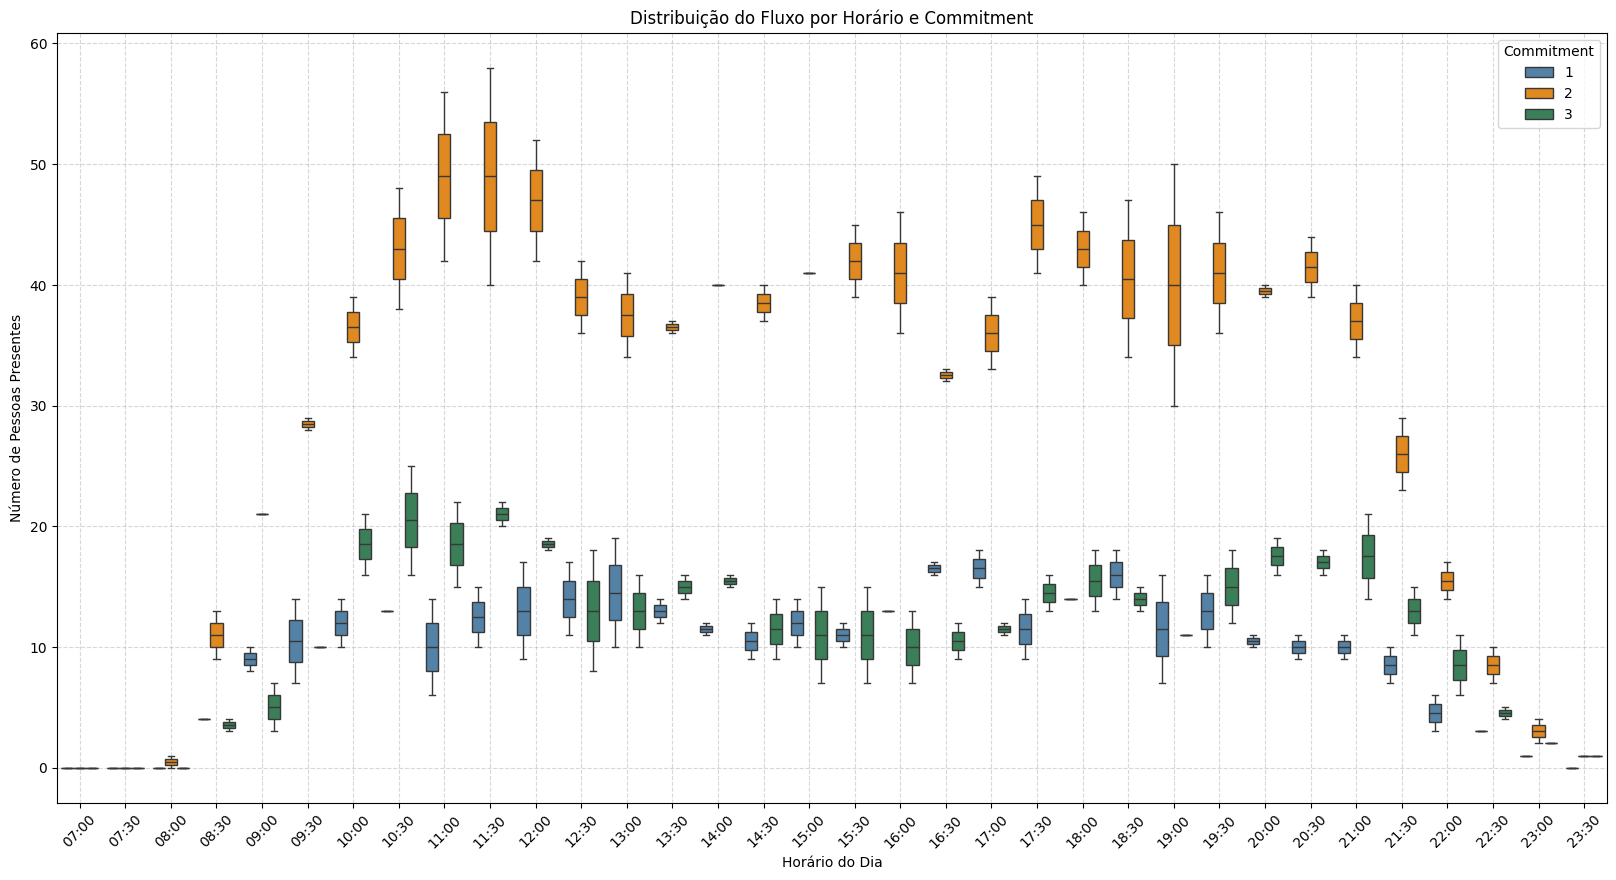

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linha do tempo de 15 em 15 minutos
horas = pd.date_range(start='07:00:00', end='23:59:00', freq='30min').time

def calcular_fluxo_por_hora(df_filtrado, horas):
    fluxo_horas = []
    for hora in horas:
        presentes = (df_filtrado['avg_time_check_in'] <= hora) & (hora <= df_filtrado['avg_time_check_out'])
        fluxo_horas.append(presentes.sum())
    return fluxo_horas

# Preparar dados para boxplot
dados_boxplot = []

# Planos para iterar e nome para exibir
planos = [(0, 'Standard'), (1, 'Premium')]

for abono, nome_plano in planos:
    df_plano = df[df['abonoment_type'] == abono]
    for commitment in [1, 2, 3]:
        df_commit = df_plano[df_plano['commitment'] == commitment]
        fluxo = calcular_fluxo_por_hora(df_commit, horas)
        for hora, fluxo_valor in zip(horas, fluxo):
            dados_boxplot.append({
                'Plano': nome_plano,
                'Commitment': str(commitment),
                'Horario': hora.strftime('%H:%M'),
                'Fluxo': fluxo_valor
            })

df_fluxo = pd.DataFrame(dados_boxplot)

# Plot com seaborn
plt.figure(figsize=(20, 10))
sns.boxplot(
    data=df_fluxo,
    x='Horario',
    y='Fluxo',
    hue='Commitment',
    palette={ '1': 'steelblue', '2': 'darkorange', '3': 'seagreen' }
)

plt.title('Distribuição do Fluxo por Horário e Commitment')
plt.xticks(rotation=45)
plt.xlabel('Horário do Dia')
plt.ylabel('Número de Pessoas Presentes')
plt.legend(title='Commitment')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


#### Insights Principais

1. **Padrão de Frequência por Commitment**
    - **Commitment 3 (Alto)**: 
      - Picos nos horarios: `10:30h` e `21:00h` 
      - Sua frequência decai durante a tarde (`13:00h` as `18:30h`) <br><br>

    - **Commitment 2 (Médio)**:
      - Maior concentração no início da manhã (`10:00h` as `13:00h` ) e fim de tarde / inicio da noite (`17:30h` as `20:30h`)
      - Queda considerável no período vespertino 
      - São a maior quantidade de alunos durante todo o dia <br><br>

    - **Commitment 1 (Baixo)**:
      - Maior concentração no período do almoço (`12:00h`as `13:00h`)
      - São a menor quantidade de alunos durante todo o dia <br><br>

#### Recomendações Estratégicas

1. **Gestão de Capacidade**
   - Alocar menos instrutores no período das `14:00h` as `16:30h`
   - Manutenção das máquinas no período `14:00h` as `16:00h` (vale de fluxo)

> **Dado Crítico**: Clientes Commitment 3 geram 4x mais receita por hora ocupada. Priorizar retenção deste grupo.

### Análise de Fluxo por Horário e Dia da Semana


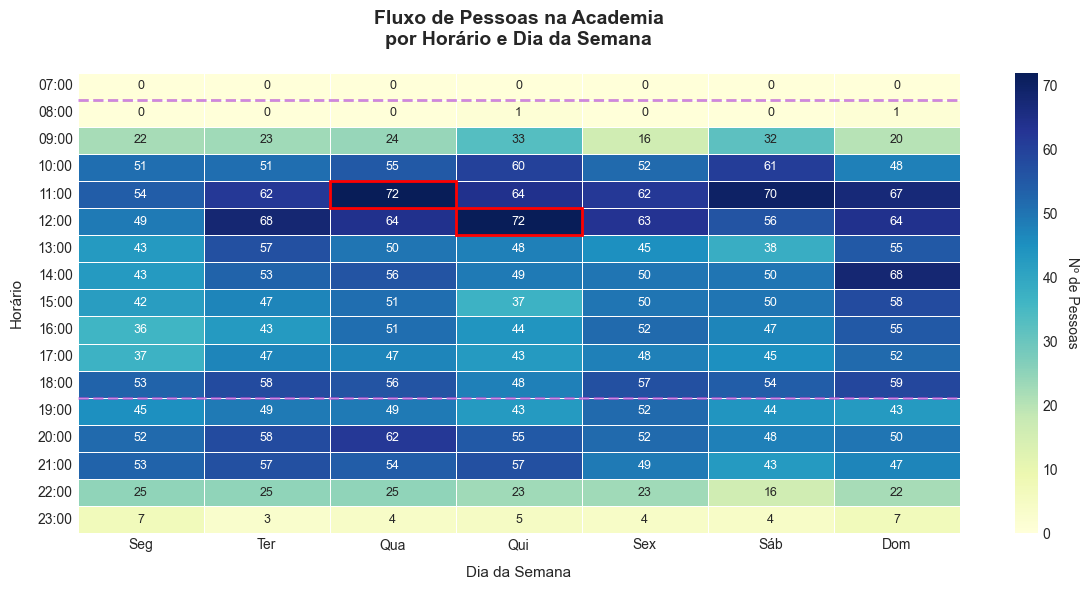

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Função necessária para contar os presentes
def contar_presentes_no_horario(df, dia_col, horario):
    df_dia = df[df[dia_col] == 1]
    hora_time = horario.time() if hasattr(horario, 'time') else horario
    presentes = (df_dia['avg_time_check_in'] <= hora_time) & (hora_time <= df_dia['avg_time_check_out'])
    return presentes.sum()

# Dados
dias_semana = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
horarios = pd.date_range(start="07:00", end="23:59", freq="H").time
fluxo_matrix = pd.DataFrame(index=horarios, columns=dias_semana)

# Preenchimento da matriz
for dia in dias_semana:
    for horario in fluxo_matrix.index:
        fluxo_matrix.loc[horario, dia] = int(contar_presentes_no_horario(df, dia, horario))

fluxo_matrix = fluxo_matrix.apply(pd.to_numeric)

# Configuração de estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Criar figura
plt.figure(figsize=(12, 6))

# Heatmap
ax = sns.heatmap(
    fluxo_matrix,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='.0f',
    annot_kws={'fontsize': 9},
    cbar_kws={'label': 'Número de Pessoas'}
)

# Títulos e rótulos
plt.title('Fluxo de Pessoas na Academia\npor Horário e Dia da Semana', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=11, labelpad=10)
plt.ylabel('Horário', fontsize=11, labelpad=10)

# Personalização dos eixos
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
ax.set_yticklabels([h.strftime('%H:%M') for h in horarios], rotation=0)

# Linhas de destaque
ax.axhline(y=8-7, color='mediumorchid', linewidth=2, linestyle='--', alpha=0.7)  # 19:00
ax.axhline(y=19-7, color='mediumorchid', linewidth=2, linestyle='--', alpha=0.7)  # 13:00

# Barra de cores
cbar = ax.collections[0].colorbar
cbar.set_label('Nº de Pessoas', rotation=270, labelpad=15)

# Destaque para o pico
max_val = fluxo_matrix.max().max()
for y in range(len(fluxo_matrix)):
    for x in range(len(dias_semana)):
        if fluxo_matrix.iloc[y, x] == max_val:
            ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='red', lw=2))

plt.tight_layout()
plt.show()

####  Insights Principais

1. **Padrões de Pico Diários**
    - **Horário Nobre**: `11:00h as 12:00h` (pico de **72** pessoas na Quarta-feira às `11:00h` e quinta-feira as `12:00h`)
    - **Fim de Semana**:
      - Sábado: Pico mais cedo começando as `10:00h`
      - Domingo: Fluxo mais estável (*49-67* pessoas das `10:00h` as `21:00h`) <br><br>

2. **Variações Notáveis**
    - **Quarta-feira**: Dia mais movimentado (72 pessoas às 11h), atingindo o pico mais rápido que quinta-feira
    - **Quinta-feira**: Queda acentuada após o almoço (72 para 48 pessoas das `12:00h` as `13:00h`)

3. **Oportunidades por Período**
    - **Manhã (9h-12h)**:
      - Grandes picos em dias úteis
      - Necessidade de mais instrutores <br><br>
      
    - **Tarde (14h-17h)**:
      - Ocupação média de 45-55 pessoas
      - Ideal para aulas em pequenos grupos <br><br>
      
    - **Noite (20h-23h)**:
      - Grande queda no fluxo de alunos (55 para 22 pessoas em média) <br><br>

####  Recomendações Estratégicas

1. **Gestão de Capacidade**
   - Alocar grande parte dos recursos para o período entre  `10:00h` e `13:00h`

2. **Programação de Aulas**
   - Aulas coletivas às Quartas `11:00h` e Quintas as `12:00h` (pico máximo)
   - Workshops aos Sábados `10:00h` as `12:00h` <br><br>

> **Dado Crítico**: Diferença de 72 pessoas (pico) vs 7 pessoas (vale) demonstra oportunidade de melhor distribuição ou corte de gasto modificando o horário de funcionamento.

###  Análise de Popularidade de Aulas por Tipo de Plano


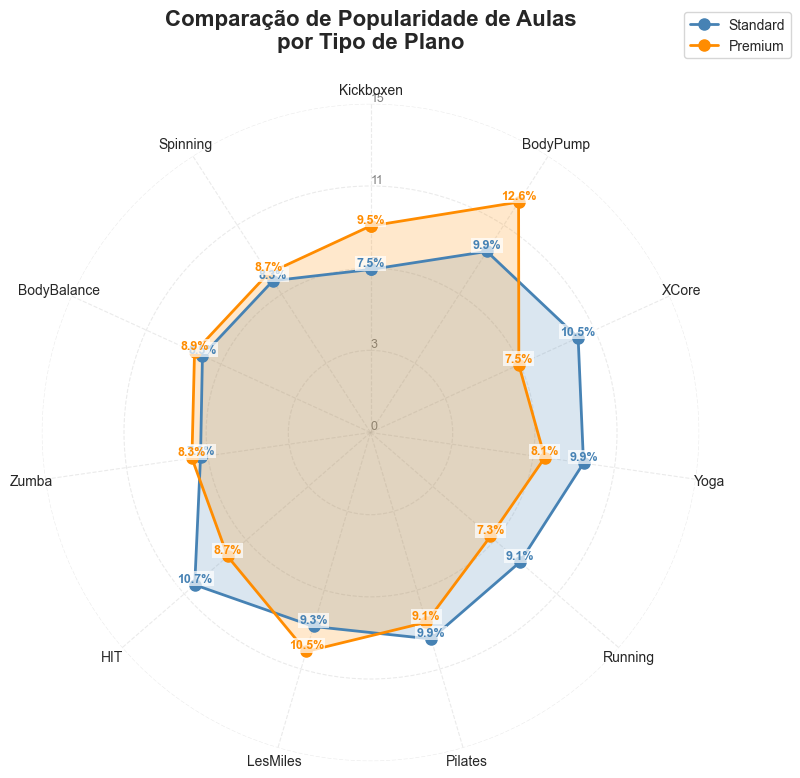

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dados de exemplo (substitua com seus dados reais)
aulas = ['Kickboxen', 'BodyPump', 'XCore', 'Yoga', 'Running', 'Pilates',
         'LesMiles', 'HIT', 'Zumba', 'BodyBalance', 'Spinning']

# 1. Primeiro, calcular as porcentagens de participação
plano_percent = {'Standard': [], 'Premium': []}

for plano_valor, nome in zip([0, 1], ['Standard', 'Premium']):
    subset = df[df['abonoment_type'] == plano_valor]
    total = len(subset)
    for aula in aulas:
        participacao = (subset[aula].sum() / total * 100) if total > 0 else 0
        plano_percent[nome].append(round(participacao, 1))

# 2. Criar o DataFrame
df_plano_pct = pd.DataFrame({
    'Aula': aulas,
    'Standard': plano_percent['Standard'],
    'Premium': plano_percent['Premium']
})

# 3. Configurações do gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['polaraxes.grid'] = True

categories = aulas
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()

# Dados
standard = df_plano_pct['Standard'].values
premium = df_plano_pct['Premium'].values

# 4. Criar a figura
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# 5. Plot principal
ax.fill(angles + angles[:1], np.append(standard, standard[0]), 'steelblue', alpha=0.2)
ax.plot(angles + angles[:1], np.append(standard, standard[0]), 'steelblue', 
       linewidth=2, marker='o', markersize=8, label='Standard')

ax.fill(angles + angles[:1], np.append(premium, premium[0]), 'darkorange', alpha=0.2)
ax.plot(angles + angles[:1], np.append(premium, premium[0]), 'darkorange', 
       linewidth=2, marker='o', markersize=8, label='Premium')

# 6. Configuração dos eixos
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels([])
ax.set_rlabel_position(0)

# 7. Grades e rótulos
max_val = max(np.max(standard), np.max(premium))
yticks = np.linspace(0, max_val * 1.2, 5)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y)}" for y in yticks], fontsize=9, color='gray')
ax.grid(True, linestyle='--', alpha=0.4)

# 8. Adicionar rótulos
for angle, label, std_val, prem_val in zip(angles, categories, standard, premium):
    ax.text(angle, max_val * 1.25, label, ha='center', va='center', fontsize=10)
    ax.text(angle, std_val, f"{std_val:.1f}%", ha='center', va='bottom', 
           fontsize=9, color='steelblue', weight='bold',
           bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    ax.text(angle, prem_val, f"{prem_val:.1f}%", ha='center', va='bottom',
           fontsize=9, color='darkorange', weight='bold',
           bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# 9. Elementos finais
ax.spines['polar'].set_visible(False)
plt.title('Comparação de Popularidade de Aulas\npor Tipo de Plano', 
         pad=40, fontsize=16, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.15), frameon=True)

plt.tight_layout()
plt.show()

#### Insights Principais

* 1. **Preferências Distintas por Plano**
    - **Planos Premium**
      - Preferem aulas internas e intensas como *Kickboxen* e *BodyPump* <br><br>
      
    - **Planos Standard**
      - Preferem aulas aeróbicas como *Xcore*, *Hit*, *Yoga* e *Running* <br><br>

#### 2. **Top 3 Aulas por Plano**
| Plano    | 1º Lugar    | 2º Lugar     | 3º Lugar    |
|:----------:|:-------------:|:--------------:|:-------------:|
| Premium  | BodyPump    | LesMiles     | Kickboxen   |
| Standard | Hit        | Xcore     | Yoga|Pilates     |

#### 3. **Oportunidades de Cross-Selling**
- **Popularidade equilibrada** (50/50)
    * `Zumba`, `BodyBalance`, `Pilates` e `Spinning`
      - Podem servir como "ponte" para conversão de planos Standard para Premium <br><br>
      
### 📌 Recomendações Estratégicas

1. **Comunicação Segmentada**
   - Marketing Premium: foco em resultados e performance
   - Marketing Standard: ênfase na experiência social

> **Dado Crítico**: Clientes Premium têm 3.2x mais probabilidade de frequentar aulas especializadas.

# Pontos de Melhoria para o Dataset

**Recomenda-se que as propostas de aprimoramento no armazenamento de dados sejam apresentadas simultaneamente a:**

1. **Departamento Técnico**  
   - Para avaliação de viabilidade de implementação  
   - Análise de custos e prazos de desenvolvimento  <br><br>

2. **Time de Marketing**  
   - Para exploração estratégica dos novos dados  
   - Desenvolvimento de campanhas baseadas nos insights potenciais  

**Protocolo Obrigatório:**  
* Nenhuma alteração deve ser implementada sem:  
    - Aprovação formal da diretoria  
    - Alinhamento entre os departamentos  
    - Plano de ação documentado  

*Justificativa:* Garantir que as melhorias técnicas gerem efetivamente valor de negócio, evitando retrabalhos e assegurando conformidade com a estratégia global.

####  Recomendações Essenciais

1. **Dias Desde a Matrícula**
    - *O que armazenar*:
        - Contagem diária desde a data de cadastro <br><br> 
    - *Porque*:  
      - Permite análise de retenção por coorte  
      - Identifica padrões de churn *(ex: 80% cancelam nos primeiros 90 dias)* 
      - Facilita campanhas de "aniversário de plano" <br><br>

2. **Histórico de Renovações**  
    - *O que armazenar*:  
      - Número de renovações  
      - Tipo de upgrade/downgrade em cada renovação  <br><br>
      
    - *Porque*:  
      - Revela padrões de fidelização  
      - Identifica clientes propensos a upgrades  
      - Calcula LTV (Lifetime Value) preciso  <br><br>

3. **Data de Cancelamento**  
    - *O que armazenar*:  
      - Data exata do cancelamento  
      - Motivo (*caso tenha*)  <br><br>
      
    - *Porque*:  
      - Permite análises de sazonalidade de churn  
      - Crucial para modelos preditivos de retenção  
      - Base para campanhas de win-back <br><br> 

4. **Streak de Frequência**  
    - *O que armazenar*:  
      - Máximo de dias consecutivos com check-in  
      - Atual "sequência" de check-in seguidos <br><br>
      
    - *Porque*:  
      - Identifica hábitos consolidados ( ex: clientes com streak >15 dias têm 5x menos churn)  
      - Permite gamificação (recompensar streaks)  

> **Exemplo Prático**: Saber que clientes que cancelam após 3 meses (e nunca renovaram) têm 40% de probabilidade de retorno com oferta certa.

# Apresentação *(Power BI)*

* Acesse o [**Dashboard**](https://app.powerbi.com/view?r=eyJrIjoiOWU2YmZiNmUtODE4Mi00OTFjLTk5NGQtMmQ3ZTU4YTEzZWQ1IiwidCI6IjJmNGMxYjM3LTk1MGEtNGRhZS05Njc1LWI3MTk4Y2E0NDVhZCJ9) 

## Processamento de Dados pelo Power Query

### Transformações Realizadas
- **Padronização de Colunas**:
  - Renomeei colunas e resultados para português, melhorando a clareza e apresentação dos dados <br><br>
 

- **Reestruturação de Dados (Unpivot)**:
  - Transformei as seguintes colunas em linhas para viabilizar a criação dos visuais:
    - `dias da semana`
    - `Aulas Coletivas` <br><br>
    
- **Criação de Faixas Horárias**:
  - Desenvolvi uma coluna agrupando horários em intervalos de 2 horas (ex: `07h às 08h`, `09h às 10h`)
  - Utilizei as variáveis `check-in` e `avg_time` como base para determinar o horário de comparecimento <br><br>

- **Segmentação por Idade**:
  - Agrupei a faixa etária em clusters de 10 anos:
    - `10 a 20`
    - `20 a 30`
    - `30 a 40`
    - `40 a 50` <br><br>

## Visualizações Implementadas

| Visualização | Tipo de Gráfico | Variáveis Utilizadas | Objetivo Analítico |
|--------------|-----------------|-----------------------|--------------------|
| Visão Geral | Rosca | Plano, ID | Proporção de clientes por plano de assinatura |
| Distribuição: Idade e Gênero | Colunas Clusterizadas | Idade, Gênero | Distribuição etária por gênero dos frequentadores |
| Frequência Semanal | Heatmap | Dias da Semana, Horários | Distribuição temporal de comparecimento |
| Aulas Populares | Barras Empilhadas | Aulas Coletivas, ID | Popularidade relativa das aulas oferecidas |

## Interatividade entre Visualizações

### Visão Geral
- **Filtros aplicáveis**:
  - Seleção por tipo de plano (`Premium` ou `Standard`)

### Distribuição: Idade e Gênero
- **Filtros aplicáveis**:
  - Faixa etária específica
  - Seleção por gênero (opcional)

### Frequência Semanal
- **Filtros aplicáveis**:
  - Intervalo horário (ex: `10h às 12h`)
  - Dia específico (ex: Domingo ou Quarta-feira)
  - Combinações personalizadas

### Aulas Populares
- **Filtros aplicáveis**:
  - Seleção por aula coletiva específica

## Painel de Filtros

Implementei uma seção dedicada a filtros no painel esquerdo com as seguintes opções:

### 1. Filtro por Gênero
- Masculino
- Feminino

### 2. Filtro por Frequência Semanal
- 1 check-in
- 2 a 3 check-ins
- 4 a 5 check-ins

## Imagens

### Imagem 1: 
* **Filtros**: Layout inicial, sem filtros

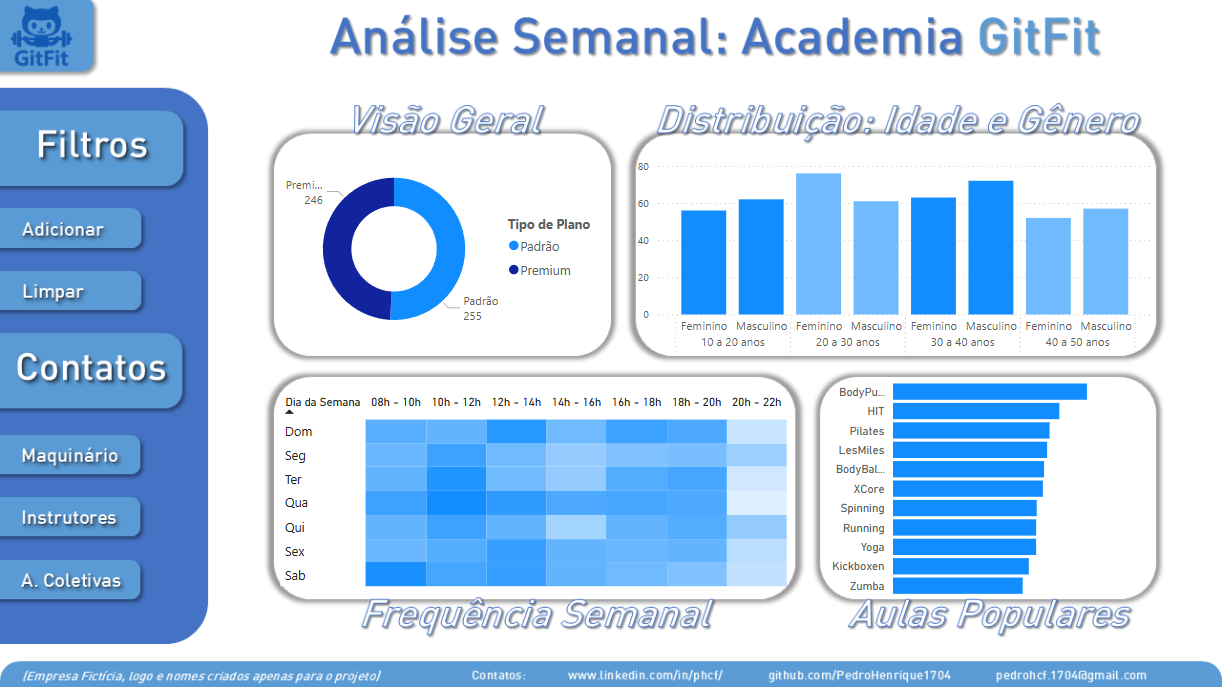


### Imagem 2: 
* **Filtros**: Clientes do sexo feminino que frequentaram a academia no horario entre 16:00h e 18:00h em 2 ou 3 dias diferentes durante a semana

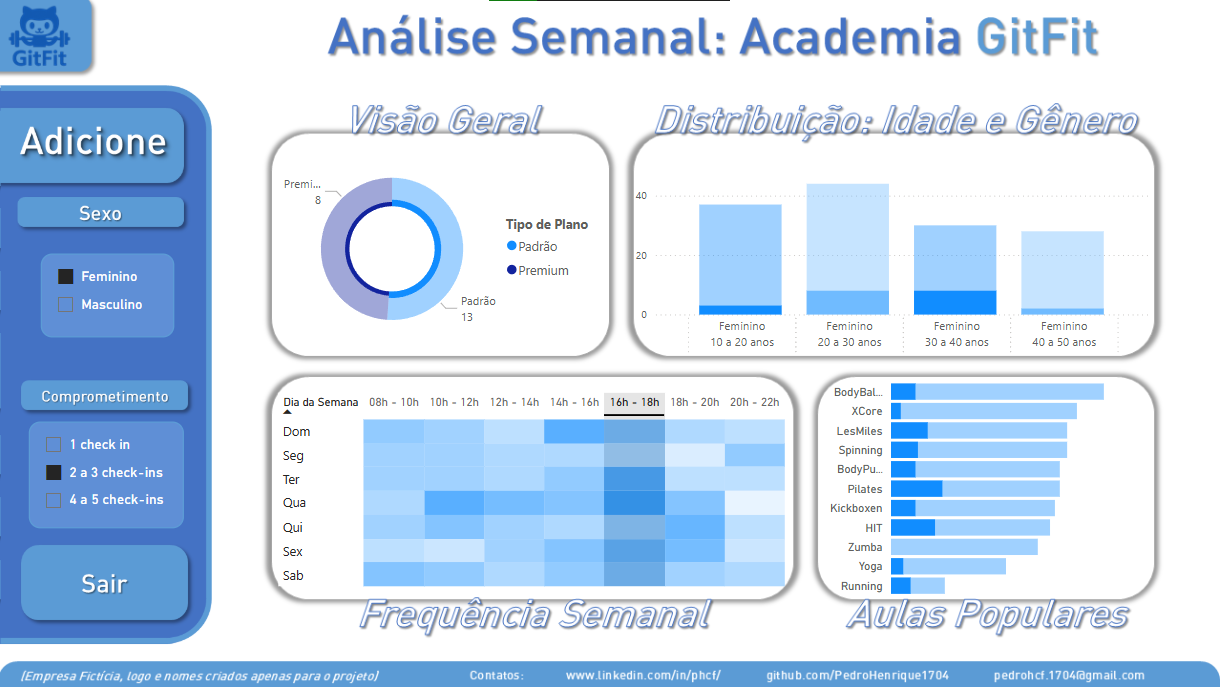